# O2 WTTX FFT v2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
googleSheetId='1GnRbcQZAYRdRuAJocRnB5EauxxcO_C-L0lw8DGAK5x0'
worksheetName='startUpdates_CSV'
path='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId,
    worksheetName
)

data = pd.read_csv(path,parse_dates=["Timestamp"],index_col=["Timestamp"])

In [3]:
data['Date']=data.index.values
data['Ticks']=range(0,len(data.index.values))

Real numbers

In [4]:
graphdata=data#.loc['2020-02-29':'2020-03-04',:]

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

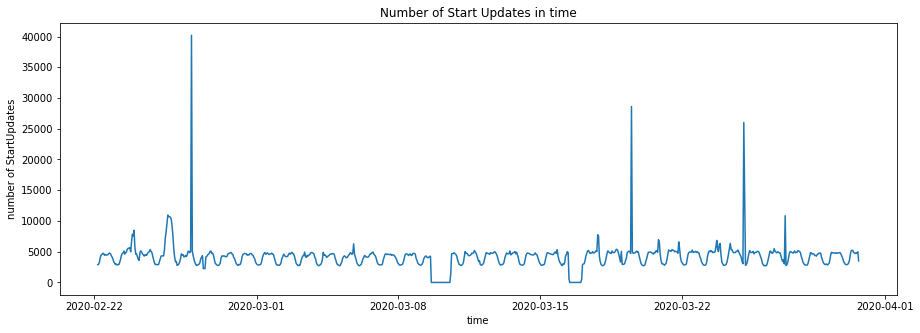

In [5]:
plt.figure(figsize=(15,5))
plt.title('Number of Start Updates in time')
plt.plot(graphdata.Date, graphdata.Count)
plt.xlabel('time')
plt.ylabel('number of StartUpdates')
plt.show

### Training period
Daily periodicity with period T=24h.

In [6]:
trainingdata=data.loc['2020-02-29':'2020-03-04',:];

In [7]:
A=trainingdata.Count.mean()
B=(trainingdata.Count.max()-trainingdata.Count.min())/2
Fi=49.2 #estimate
T=24 #period=24h
Omega=2*np.pi/T

In [8]:
data['SinTrend']=A+B*np.sin(Fi+Omega*data.Ticks)

In [9]:
data['CountWithoutSinTrend']=data.Count-data.SinTrend

In [10]:
graphdata=data.loc['2020-02-29':'2020-03-04',:]

<function matplotlib.pyplot.show(*args, **kw)>

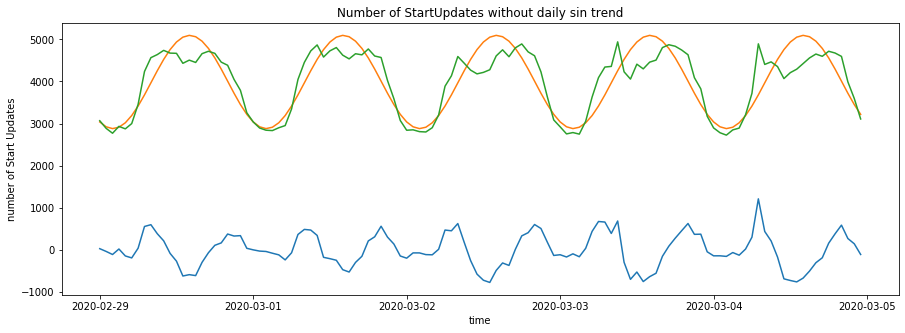

In [11]:
plt.figure(figsize=(15,5))
plt.title('Number of StartUpdates without daily sin trend')
plt.plot(graphdata.Date, graphdata.CountWithoutSinTrend)
plt.plot(graphdata.Date, graphdata.SinTrend)
plt.plot(graphdata.Date, graphdata.Count)
#plt.xticks(data.index[::100])
plt.xlabel('time')
plt.ylabel('number of Start Updates')
plt.show

Daily periodicity with period T=12h. It represents morning and aftrenoon peeks.

In [12]:
trainingdata=data.loc['2020-02-29':'2020-03-04',:]

In [13]:
A=trainingdata.CountWithoutSinTrend.mean()
B=(trainingdata.CountWithoutSinTrend.max()-trainingdata.CountWithoutSinTrend.min())/2
Fi=12 #estimate
T=12 #period = 12 hours
Omega=2*np.pi/T

In [14]:
data['SinPeriodicity']=A+B*np.sin(Fi+Omega*data.Ticks)

In [15]:
graphdata=data.loc['2020-02-29':'2020-03-05',:]

<function matplotlib.pyplot.show(*args, **kw)>

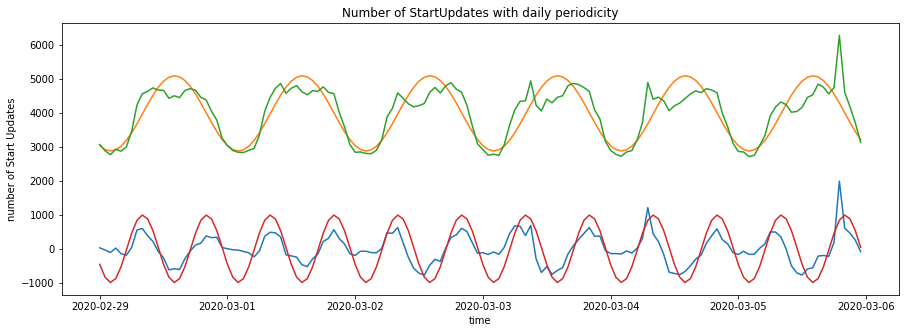

In [16]:
plt.figure(figsize=(15,5))
plt.title('Number of StartUpdates with daily periodicity')
plt.plot(graphdata.Date, graphdata.CountWithoutSinTrend)
plt.plot(graphdata.Date, graphdata.SinTrend)
plt.plot(graphdata.Date, graphdata.Count)
plt.plot(graphdata.Date, graphdata.SinPeriodicity)
#plt.xticks(data.index[::100])
plt.xlabel('time')
plt.ylabel('number of Start Updates')
plt.show

### Real numbers
Prediction on trainign period

In [17]:
data['CountPrediction']=data.SinTrend+data.SinPeriodicity

In [18]:
graphdata=data.loc['2020-02-29':'2020-03-02',:]

<function matplotlib.pyplot.show(*args, **kw)>

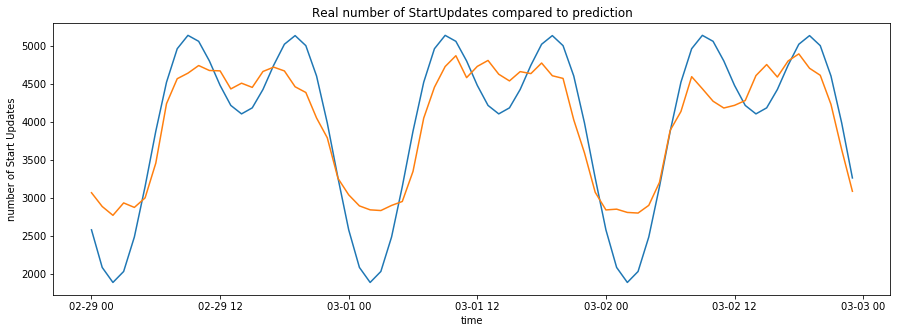

In [19]:
plt.figure(figsize=(15,5))
plt.title('Real number of StartUpdates compared to prediction')
plt.plot(graphdata.Date, graphdata.CountPrediction)
plt.plot(graphdata.Date, graphdata.Count)
#plt.xticks(data.index[::100])
plt.xlabel('time')
plt.ylabel('number of Start Updates')
plt.show

Calculating of range

In [20]:
rangeConst=1.1
data['Range']=rangeConst*data.CountPrediction

In [21]:
graphdata=data

<function matplotlib.pyplot.show(*args, **kw)>

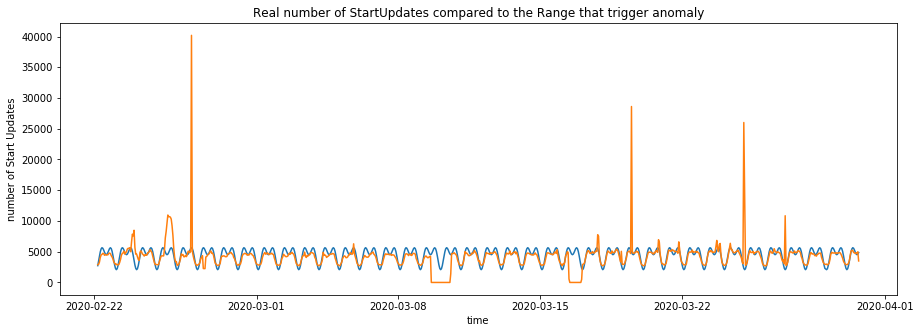

In [22]:
plt.figure(figsize=(15,5))
plt.title('Real number of StartUpdates compared to the Range that trigger anomaly')
plt.plot(graphdata.Date, graphdata.Range)
plt.plot(graphdata.Date, graphdata.Count)
plt.xlabel('time')
plt.ylabel('number of Start Updates')
plt.show